In [9]:
import pickle
# open a file, where you stored the pickled data
file = open('fake_anno.pkl', 'rb')

# dump information to that file
data = pickle.load(file)

In [10]:
data

{'frame_dir': '',
 'label': -1,
 'img_shape': (512, 512),
 'original_shape': (512, 512),
 'start_index': 0,
 'modality': 'Pose',
 'total_frames': 210,
 'keypoint': array([[[[276.92685, 261.3913 ],
          [289.75635, 245.3544 ],
          [264.09732, 245.3544 ],
          ...,
          [382.77032, 412.13806],
          [385.9777 , 489.11514],
          [116.55794, 505.15204]],
 
         [[279.14044, 261.98   ],
          [291.42645, 246.6225 ],
          [263.7829 , 243.551  ],
          ...,
          [374.3571 , 412.48376],
          [392.7861 , 492.3429 ],
          [365.14258, 498.4859 ]],
 
         [[278.32523, 260.57852],
          [290.7983 , 248.10547],
          [265.85217, 244.9872 ],
          ...,
          [390.58276, 407.13696],
          [401.49667, 497.56662],
          [401.49667, 497.56662]],
 
         ...,
 
         [[269.34424, 255.12877],
          [284.43286, 246.0756 ],
          [260.29105, 240.04015],
          ...,
          [394.57977, 412.05045],
    

In [12]:
data['keypoint'][0].shape

(210, 17, 2)

In [3]:
from mmaction.datasets.transforms import FormatGCNInput, PackActionInputs

from mmaction.datasets.transforms import  GenSkeFeat, PoseDecode, PreNormalize2D, UniformSampleFrames

In [4]:
pre_normalize_2d = PreNormalize2D(img_shape=(512, 512))
inp = pre_normalize_2d(data)
gen_ske_feat = GenSkeFeat(dataset='coco', feats=['j'])
ret2 = gen_ske_feat(inp)
sampling = UniformSampleFrames(clip_len=60)
results = sampling(ret2)
pose_decode = PoseDecode()
decode_results = pose_decode(results)
format_shape = FormatGCNInput(num_person=1)
results = format_shape(decode_results)
transform = PackActionInputs()
results = transform(results)

print(results)

{'inputs': tensor([[[[[ 8.7208e-02,  1.7885e-02,  9.2221e-01],
           [ 1.3593e-01, -3.0838e-02,  9.1565e-01],
           [ 3.8485e-02, -4.3019e-02,  8.8561e-01],
           ...,
           [ 5.2571e-01,  5.9038e-01,  1.9665e-01],
           [ 5.6835e-01,  9.4362e-01,  8.2417e-02],
           [ 5.6835e-01,  9.4362e-01,  4.7819e-02]],

          [[ 8.3727e-02,  1.5825e-02,  9.2687e-01],
           [ 1.3279e-01, -4.5508e-02,  9.0828e-01],
           [ 3.4660e-02, -4.5508e-02,  8.6726e-01],
           ...,
           [ 5.1306e-01,  5.9236e-01,  2.1809e-01],
           [ 5.5599e-01,  9.3583e-01,  9.6338e-02],
           [ 1.2053e-01,  6.4143e-01,  5.8894e-02]],

          [[ 7.6649e-02, -2.8356e-03,  8.9361e-01],
           [ 1.2413e-01, -5.0322e-02,  9.0414e-01],
           [ 2.9163e-02, -6.2193e-02,  8.8246e-01],
           ...,
           [ 5.4557e-01,  6.1448e-01,  2.4553e-01],
           [ 5.4557e-01,  9.5876e-01,  1.2188e-01],
           [ 5.4557e-01,  9.5876e-01,  6.1709e-02]],


In [5]:
results['inputs'].shape

torch.Size([1, 1, 60, 17, 3])

In [ ]:
 # pose_data = dict(
 #        total_frames=60,
 #        label=pose_data['label'],
 #        keypoint=pose_data['keypoint'][:, frame:frame+60, :], 
 #        keypoint_score = pose_data['keypoint_score'][:, frame:frame+60, :],
 #        img_shape=(512, 512))
    
 #    # pose_data['total_frames'] = 60
 #    # pose_data['keypoint'] = pose_data['keypoint'][:, frame:frame+60, :]
 #    # pose_data['keypoint_score'] = pose_data['keypoint_score'][:, frame:frame+60, :]
    
 #    pose = self.transform_pose(pose_data)

## Reference: https://learnopencv.com/human-pose-estimation-using-keypoint-rcnn-in-pytorch/

In [20]:
import cv2 
import numpy as np 

In [45]:
import matplotlib.pyplot as plt
 
def draw_keypoints_per_person(img, keypoints, scores):
    # initialize a set of colors from the rainbow spectrum
    cmap = plt.get_cmap('rainbow')
    # create a copy of the image
    img_copy = img.copy()
    # pick a set of N color-ids from the spectrum
    color_id = np.arange(1,255, 255//len(keypoints)).tolist()[::-1]
    # iterate for every person detected

    # iterate for every keypoint-score
    for idx, kp in enumerate(range(len(scores))):
        # check the confidence score of detected keypoint
        # if scores[kp]>keypoint_threshold:
        # convert the keypoint float-array to a python-list of integers
        keypoint = tuple(map(int, keypoints[kp, :2].tolist()))
        x, y = keypoint
        # pick the color at the specific color-id
        color = tuple(np.asarray(cmap(color_id[0])[:-1])*255)
        # draw a circle over the keypoint location
        cv2.circle(img_copy, keypoint, 3, color, -1)
        cv2.putText(img_copy, str(idx), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 255, 1)
 
    return img_copy

In [46]:
keypoints[0].shape

(2,)

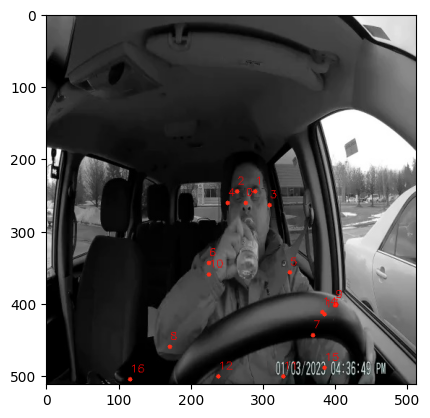

In [47]:
keypoints = data['keypoint'][0][0]	
scores = data['keypoint_score'][0][0]


img = cv2.imread("img_000001.jpg")

keypoints_img = draw_keypoints_per_person(img, keypoints, scores)


imgplot = plt.imshow(keypoints_img)
plt.show()